# Задание 2 - Descriptive Statistics and Data Exploration
Perform data exploration and visualization without using the pandas_profiling library.

    https://github.com/rolling-scopes-school/ml-intro/tree/2022/2_data_exploration
    https://www.kaggle.com/c/tabular-playground-series-apr-2021/data?select=train.csv

In [ ]:
## library input
import pandas as pd
import seaborn as sns
pd.__version__

'1.2.5'

### Цель работы
Провести анализ набора данных для выявления закономерностей и выработки гипотез. 

Посмотреть, какие признаки больше всего влияют на целевую переменную, а какие можно выбросить из рассмотрения.

# Context

The dataset is synthetic but based on a real dataset (in this case, the actual Titanic data!) and generated using a CTGAN. The statistical properties of this dataset are very similar to the original Titanic dataset.

https://www.kaggle.com/c/tabular-playground-series-apr-2021/data?select=train.csv



**Data Dictionary**

    Variable	Definition	                        Key
    survival	Survival	                        0 = No, 1 = Yes
    pclass          Ticket class                            1 = 1st, 2 = 2nd, 3 = 3rd
    sex     	Sex	
    Age	        Age in years	
    sibsp           # of siblings / spouses aboard the Titanic	
    parch	        # of parents / children aboard the Titanic	
    ticket	        Ticket number	
    fare	        Passenger fare	
    cabin	        Cabin number	
    embarked	Port of Embarkation	                C = Cherbourg, Q = Queenstown, S = Southampton


**Variable Notes**

    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(100000, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

    Verifying row count
    Verifying column count
    Verifying column types
    Checking for duplicates
    Missing data exploration
    
    Check if the data is being generated the way you think. 
    Check if data values types corresponds to the feature meaning.
    Check variables with the same meaning.

In [ ]:
###  Verifying row count, Verifying column count
##   100000 rows, 12 columns 
df.shape

(100000, 12)

In [ ]:
###   Verifying column types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
###   Checking for duplicates
##    No duplicates found
print(df.drop_duplicates().shape)

(100000, 12)


#### Missing data exploration

In [ ]:
###  Missing data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [ ]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

Есть пропущенные данные в возрасте, номере билета, стоимости билета, каюте, месте посадки.
Пока не будем их ничем заполнять и отбрасывать тоже не будем.

Проверим, связаны ли пропуски в разных столбцах.

In [ ]:
##  нет строк, в которых отсутствуют все данные одновременно
print(df[df['Age'].isna() & df['Ticket'].isna() & 
         df['Cabin'].isna() & df['Embarked'].isna() & 
         df['Fare'].isna()].shape)

(0, 12)

In [ ]:
###  нет информации о билете, каюте и цене - в 5 случаях
print('----- nan in Ticket, Cabin, Fare')
print(df[df['Ticket'].isna() & 
         df['Cabin'].isna() & 
         df['Fare'].isna()].shape)

----- nan in Ticket, Cabin, Fare
(5, 12)


In [ ]:
### отсутсвие возраста бoльше всего пересекается с отсутствием Cabin
df[df['Age'].isna()].isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age            3292
SibSp             0
Parch             0
Ticket          156
Fare              5
Cabin          2247
Embarked          2
dtype: int64

In [ ]:
missing = ['Age', 'Ticket', 'Cabin', 'Embarked', 'Fare']
for feature in missing:
    print("\n----- ", feature, "is null -----")
    print(df[df[x].isnull()].isnull().sum())


-----  Age is null -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              5
SibSp            0
Parch            0
Ticket           6
Fare           134
Cabin           92
Embarked         1
dtype: int64

-----  Ticket is null -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              5
SibSp            0
Parch            0
Ticket           6
Fare           134
Cabin           92
Embarked         1
dtype: int64

-----  Cabin is null -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              5
SibSp            0
Parch            0
Ticket           6
Fare           134
Cabin           92
Embarked         1
dtype: int64

-----  Embarked is null -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              5
SibSp            0
Parch            0
Ticket     

Итог про пропущенные данные

    Отсутствующие данные есть в столбцах 'Age', 'Ticket', 'Cabin', 'Embarked', 'Fare'
    Нет строк, в которых пропущены все эти данные одновременно.
    Больше всего отсутствуют данных о каюте - 67866 случаев.
    Отсутствие данных о возрасте (3292 случаев) больше всего пересекается с отсутствием Cabin (2247 случаев) и Ticket (156 случаев)
    Отсутствие данных о билете (4623) часто сопровождается отсутствием информации о каюте.
    Отсутствие данных о цене (134) часто сопровождается отсутствием информации о каюте.
    Отсутствие данных о месте посадки (250) часто сопровождается отсутствием информации о каюте.
    Пропуски данных не выглядят скорреллированными.


# Data exploration

    Understanding the meaning of each variable
    Data quality checks
    Visualization of and summary statistics for each variable
    Assessing the relationship between variables

### Exploring individual variables

    Histograms
    Boxplots
    Summary statistics
    z scores

In [ ]:
### summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


### Examining relationship between variables

    Boxplots
    Heatmaps
    Scatterplots

In [ ]:
print("---- survived by class and sex")
print(df.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True))

---- survived by class and sex
Pclass  Sex     Survived
1       female  1           0.768279
                0           0.231721
        male    0           0.633265
                1           0.366735
2       female  1           0.769024
                0           0.230976
        male    0           0.753359
                1           0.246641
3       female  1           0.568416
                0           0.431584
        male    0           0.893811
                1           0.106189
Name: Survived, dtype: float64


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

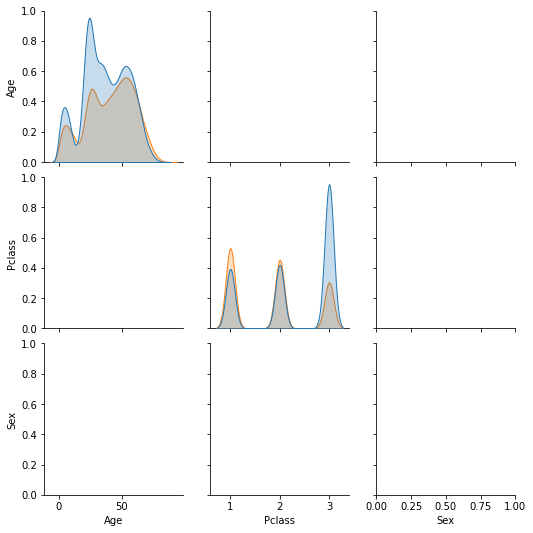

In [ ]:
sns.pairplot(df, vars=["Age", "Pclass", "Sex"], hue="Survived", dropna=True)
sns.plt.show()

# Summary

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed60024c-3bce-4ff3-8f17-51e7b533774d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>